In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import plotly.express as px
from urllib.parse import urlparse
import tensorflow as tf
print(tf.__version__)
%matplotlib inline

2.8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


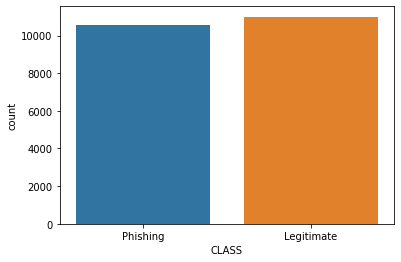

In [ ]:
# Import the dataset
df = pd.read_csv('Dataset (1).csv')
sns.countplot(df['CLASS'])
df1 = df.replace(['Phishing', 'Legitimate'], [0, 1])

In [ ]:
df.head()

,URL,CLASS
0,https://linktr.ee/btinternetlee,Phishing
1,https://tinyurl.com/3j3k2mzd,Phishing
2,https://nevstr.weebly.com/,Phishing
3,https://link.account-update824.com/em=,Phishing
4,https://amazomerowihuiegarbcc.xyz/,Phishing


In [ ]:
df.tail()

,URL,CLASS
21576,http://codepen.io/api/oembed?url=http%3A%2F%2F...,Legitimate
21577,http://comicbook.com/2014/10/30/pee-wee-herman...,Legitimate
21578,http://comicbook.com/2014/12/25/top-ten-comic-...,Legitimate
21579,http://comicbook.com/2014/12/30/captain-americ...,Legitimate
21580,http://comicbook.com/2015/03/06/jared-leto-wan...,Legitimate


In [ ]:
# Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 0
  except:
    ip = 1
  return ip

In [ ]:
# Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 0
  else:
    at = 1
  return at

In [ ]:
# Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length =1
  else:
    length = 0
  return length

In [ ]:
# Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def get_protocol(url):
    protocol = urlparse(url)
    if protocol.scheme == 'https':
        return 0
    else:
        return 1

In [ ]:
# Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [ ]:
# Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 0
    else:
      return 1
  else:
    return 1

In [ ]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [ ]:
# Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 0
    else:
        return 1

In [ ]:
# Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 0          # phishing
    else:
        return 1          # legitimate

In [ ]:
ip = []
attherate = []
url_length= []
protocol = []
singleSlash= []
doubleSlash= []
tinyurl = []
hyphen= []

In [ ]:
def extract_all_features():
  counter = 0
  for url in df['URL']:
        counter = counter + 1
        ip.append(havingIP(url))
        attherate.append(haveAtSign(url))
        url_length.append(getLength(url))
        singleSlash.append(getDepth(url))
        doubleSlash.append(redirection(url))
        protocol.append(get_protocol(url))
        hyphen.append(prefixSuffix(url))
        tinyurl.append(tinyURL(url))

In [ ]:
extract_all_features()

In [ ]:
features_df = pd.DataFrame()
features_df["IP Check"] = ip
features_df["At The Rate"] = attherate
features_df["URL Length"] = url_length
features_df["Single Slash"] = singleSlash
features_df["Double Slash"] = doubleSlash
features_df["HTTP/HTTPS"] = protocol
features_df["Hyphen "] = hyphen
features_df["Tiny URL"] = tinyurl
features_df["Class"] = df1.CLASS

In [ ]:
features_df.head(20)

,IP Check,At The Rate,URL Length,Single Slash,Double Slash,HTTP/HTTPS,Hyphen,Tiny URL,Class
0,1,1,1,1,1,0,1,1,0
1,1,1,1,1,1,0,1,0,0
2,1,1,1,0,1,0,1,1,0
3,1,1,1,1,1,0,0,1,0
4,1,1,1,0,1,0,1,1,0
5,1,1,1,0,1,0,0,1,0
6,1,1,1,2,1,1,1,1,0
7,1,1,1,1,1,0,1,1,0
8,1,1,1,1,1,0,0,1,0
9,1,1,1,2,1,0,1,1,0


In [ ]:
features_df.tail(20)

,IP Check,At The Rate,URL Length,Single Slash,Double Slash,HTTP/HTTPS,Hyphen,Tiny URL,Class
21561,1,1,0,5,1,1,1,1,1
21562,1,1,0,3,1,1,1,1,1
21563,1,1,0,3,1,1,1,1,1
21564,1,1,0,3,1,1,1,1,1
21565,1,1,0,3,1,1,1,1,1
21566,1,1,0,3,1,1,1,1,1
21567,1,1,0,2,1,1,1,1,1
21568,1,1,0,2,1,1,1,1,1
21569,1,1,0,3,1,1,1,1,1
21570,1,1,0,4,1,1,1,1,1


In [ ]:
features_df.shape

(21581, 9)

In [ ]:
X=features_df.iloc[:,0:8].values
y=features_df.iloc[:,8].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(10))

In [ ]:
X_train.shape

(17264, 8)

# RNN

In [ ]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import seaborn as sns; sns.set()

In [ ]:
max_features = 21581
model = Sequential()
model.add(Embedding(max_features, 7))
model.add(SimpleRNN(128))
#model.add(SimpleRNN(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(X_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
231/231 [==============================] - 3s 8ms/step - loss: 0.3312 - acc: 0.8653 - val_loss: 0.2694 - val_acc: 0.9056
Epoch 2/10
231/231 [==============================] - 2s 7ms/step - loss: 0.2757 - acc: 0.9012 - val_loss: 0.2825 - val_acc: 0.8766
Epoch 3/10
231/231 [==============================] - 2s 7ms/step - loss: 0.2705 - acc: 0.9051 - val_loss: 0.2904 - val_acc: 0.8784
Epoch 4/10
231/231 [==============================] - 2s 7ms/step - loss: 0.2685 - acc: 0.9048 - val_loss: 0.2621 - val_acc: 0.9050
Epoch 5/10
231/231 [==============================] - 2s 7ms/step - loss: 0.2661 - acc: 0.9059 - val_loss: 0.2605 - val_acc: 0.9105
Epoch 6/10
231/231 [==============================] - 2s 7ms/step - loss: 0.2634 - acc: 0.9062 - val_loss: 0.2624 - val_acc: 0.9099
Epoch 7/10
231/231 [==============================] - 2s 7ms/step - loss: 0.2615 - acc: 0.9057 - val_loss: 0.2578 - val_acc: 0.9137
Epoch 8/10
231/231 [==============================] - 2s 7ms/step - loss: 0.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 7)           151067    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               17408     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 168,604
Trainable params: 168,604
Non-trainable params: 0
_________________________________________________________________


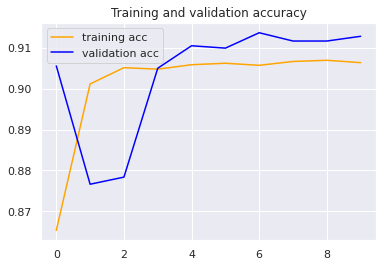

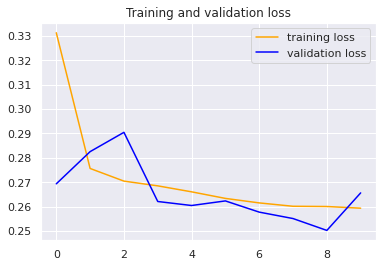

In [ ]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = (model.predict(X_test) > 0.5).astype("int32")
acc = model.evaluate(X_test, y_test)
#proba_rnn = model.predict_proba(X_test)
predict_prob=model.predict([X_test])
proba_rnn=np.argmax(predict_prob,axis=1)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

135/135 [==============================] - 0s 2ms/step - loss: 0.2889 - acc: 0.9048
Test loss is 0.29 accuracy is 0.90  
[[1864  122]
 [ 289 2042]]


# LSTM

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 8))
model.add(LSTM(128))
#model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(X_train, y_train, epochs=10, batch_size=60, validation_split=0.2)

Epoch 1/10
231/231 [==============================] - 7s 21ms/step - loss: 0.3554 - acc: 0.8571 - val_loss: 0.3433 - val_acc: 0.9067
Epoch 2/10
231/231 [==============================] - 4s 17ms/step - loss: 0.2731 - acc: 0.9006 - val_loss: 0.2701 - val_acc: 0.8928
Epoch 3/10
231/231 [==============================] - 4s 17ms/step - loss: 0.2673 - acc: 0.9033 - val_loss: 0.2615 - val_acc: 0.9065
Epoch 4/10
231/231 [==============================] - 4s 17ms/step - loss: 0.2631 - acc: 0.9041 - val_loss: 0.2611 - val_acc: 0.9094
Epoch 5/10
231/231 [==============================] - 4s 17ms/step - loss: 0.2654 - acc: 0.9026 - val_loss: 0.2530 - val_acc: 0.9067
Epoch 6/10
231/231 [==============================] - 4s 17ms/step - loss: 0.2576 - acc: 0.9059 - val_loss: 0.2480 - val_acc: 0.9117
Epoch 7/10
231/231 [==============================] - 4s 17ms/step - loss: 0.2563 - acc: 0.9069 - val_loss: 0.2572 - val_acc: 0.9123
Epoch 8/10
231/231 [==============================] - 4s 17ms/step - 

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 8)           172648    
                                                                 
 lstm (LSTM)                 (None, 128)               70144     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 242,921
Trainable params: 242,921
Non-trainable params: 0
_________________________________________________________________


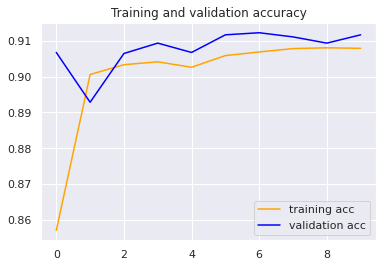

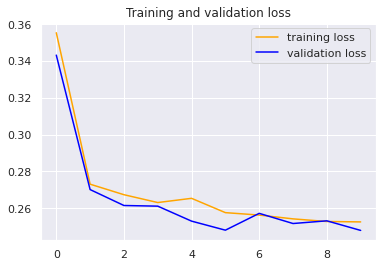

In [ ]:
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = (model.predict(X_test) > 0.5).astype("int32")
acc = model.evaluate(X_test, y_test)
#proba_ltsm = model.predict_proba(texts_test)
predict_prob=model.predict([X_test])
proba_lstm=np.argmax(predict_prob,axis=1)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

135/135 [==============================] - 1s 4ms/step - loss: 0.2596 - acc: 0.9053
Test loss is 0.26 accuracy is 0.91  
[[1879  135]
 [ 274 2029]]


# Combining RNN + LSTM

In [ ]:
np. unique(proba_rnn)

array([0])

In [ ]:
ensemble_proba = 0.3 * proba_rnn + 0.7 * proba_lstm

In [ ]:
np. unique(ensemble_proba)

array([0.])

In [ ]:
ensemble_class = np.array([1 if i >= 0.5 else 0 for i in ensemble_proba])

In [ ]:
ensemble_class[:5]

array([0, 0, 0, 0, 0])

In [ ]:
print(confusion_matrix(pred, y_test))

[[1879  135]
 [ 274 2029]]


In [ ]:
# Importing all necessary libraries
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [ ]:
accuracy_score= accuracy_score(y_test,pred)*100
print(accuracy_score)

90.52582812138058


In [ ]:
# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, pred)*100}")

Precision Score of the classifier is: 88.10247503256622


In [ ]:
# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, pred)*100}")

Recall Score of the classifier is: 93.76155268022181


In [ ]:
# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, pred)*100}")

F1 Score of the classifier is: 90.84396686814416


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2014
           1       0.94      0.88      0.91      2303

    accuracy                           0.91      4317
   macro avg       0.91      0.91      0.91      4317
weighted avg       0.91      0.91      0.91      4317



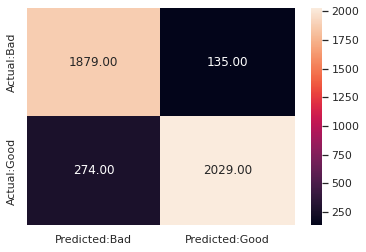

In [ ]:
print(classification_report(pred,y_test))
con  = pd.DataFrame(confusion_matrix(pred,y_test), columns = ['Predicted:Bad', 'Predicted:Good'], index = ['Actual:Bad', 'Actual:Good'])
sns.heatmap(con,annot=True,fmt='.2f')

AUC for our classifier is: 94.74345001128975


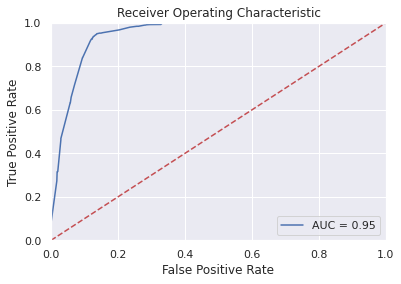

In [ ]:
from sklearn.metrics import roc_curve, auc

predict_prob=model.predict(X_test)

preds = predict_prob[:]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc*100}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()